<a href="https://colab.research.google.com/github/Esha-Sherring/summer-analytica/blob/master/Confusion_matrix_and_evaluation_metrics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Implementation of confusion matrix**

In [ ]:
# confusion matrix in sklearn
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [ ]:
# actual values
actual = [1,0,0,1,0,0,1,0,0,1]
# predicted values
predicted = [1,0,0,1,0,0,0,1,0,0]

In [ ]:
# confusion matrix
matrix = confusion_matrix(actual,predicted, labels=[1,0])
print('Confusion matrix : \n',matrix)

Confusion matrix : 
 [[2 2]
 [1 5]]


In [ ]:
# outcome values order in sklearn
tp, fn, fp, tn = confusion_matrix(actual,predicted,labels=[1,0]).reshape(-1)
print('Outcome values : \n', tp, fn, fp, tn)


Outcome values : 
 2 2 1 5


In [ ]:
# classification report for precision, recall f1-score and accuracy
matrix = classification_report(actual,predicted,labels=[1,0])
print('Classification report : \n',matrix)

Classification report : 
               precision    recall  f1-score   support

           1       0.67      0.50      0.57         4
           0       0.71      0.83      0.77         6

    accuracy                           0.70        10
   macro avg       0.69      0.67      0.67        10
weighted avg       0.70      0.70      0.69        10



**AUC-ROC**

In [21]:

# roc curve and auc
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from matplotlib import pyplot


In [22]:
# generate 2 class dataset
X, y = make_classification(n_samples=1000, n_classes=2, random_state=1)

In [24]:
# split into train/test sets
trainX, testX, trainy, testy = train_test_split(X, y, test_size=0.5, random_state=2)

In [25]:
model = LogisticRegression(solver='lbfgs')
model.fit(trainX, trainy)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [26]:
# predict probabilities
lr_probs = model.predict_proba(testX)

In [27]:
print(lr_probs)

[[4.02731514e-03 9.95972685e-01]
 [2.00515726e-03 9.97994843e-01]
 [9.94701169e-01 5.29883066e-03]
 [8.47625806e-01 1.52374194e-01]
 [1.66665036e-03 9.98333350e-01]
 [4.99938552e-01 5.00061448e-01]
 [9.80236861e-01 1.97631392e-02]
 [9.76536616e-01 2.34633843e-02]
 [1.79993032e-02 9.82000697e-01]
 [2.93534820e-01 7.06465180e-01]
 [9.95837980e-01 4.16201961e-03]
 [2.53553400e-01 7.46446600e-01]
 [9.92334325e-01 7.66567488e-03]
 [3.80412811e-02 9.61958719e-01]
 [6.47854323e-02 9.35214568e-01]
 [1.92346446e-01 8.07653554e-01]
 [8.55196114e-01 1.44803886e-01]
 [4.34676792e-02 9.56532321e-01]
 [8.43042493e-01 1.56957507e-01]
 [5.50912415e-02 9.44908759e-01]
 [1.32992380e-01 8.67007620e-01]
 [5.89717936e-01 4.10282064e-01]
 [9.79518433e-01 2.04815673e-02]
 [3.32906248e-01 6.67093752e-01]
 [9.95736653e-01 4.26334713e-03]
 [4.33055309e-02 9.56694469e-01]
 [3.07422638e-01 6.92577362e-01]
 [5.59324053e-03 9.94406759e-01]
 [9.75084001e-01 2.49159988e-02]
 [4.49457316e-01 5.50542684e-01]
 [2.077854

In [28]:
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]

In [31]:
lr_auc = roc_auc_score(testy, lr_probs)
print('Logistic: ROC AUC=%.3f' % (lr_auc))

Logistic: ROC AUC=0.903


In [32]:
lr_fpr, lr_tpr, threshold = roc_curve(testy, lr_probs)

In [35]:
print("FPR :",lr_fpr)
print("TPR :",lr_tpr)
print("FPR :",threshold)

FPR : [0.         0.         0.         0.00416667 0.00416667 0.00833333
 0.00833333 0.0125     0.0125     0.01666667 0.01666667 0.025
 0.025      0.02916667 0.02916667 0.0375     0.0375     0.04583333
 0.04583333 0.05416667 0.05416667 0.05833333 0.05833333 0.0625
 0.0625     0.06666667 0.06666667 0.07083333 0.07083333 0.075
 0.075      0.07916667 0.07916667 0.08333333 0.08333333 0.0875
 0.0875     0.09166667 0.09166667 0.09583333 0.09583333 0.10833333
 0.10833333 0.1125     0.1125     0.125      0.125      0.12916667
 0.12916667 0.13333333 0.13333333 0.1375     0.1375     0.14166667
 0.14166667 0.14583333 0.14583333 0.15       0.15       0.15416667
 0.15416667 0.15833333 0.15833333 0.16666667 0.16666667 0.175
 0.175      0.17916667 0.17916667 0.18333333 0.18333333 0.20416667
 0.20416667 0.20833333 0.20833333 0.21666667 0.21666667 0.2375
 0.2375     0.25416667 0.25416667 0.25833333 0.25833333 0.29583333
 0.29583333 0.3        0.3        0.30416667 0.30416667 0.3125
 0.3125     0.316666

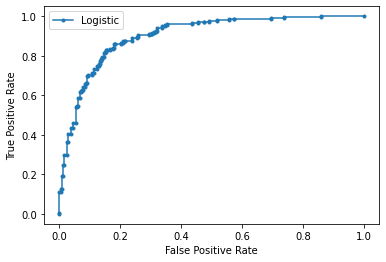

In [38]:
pyplot.plot(lr_fpr, lr_tpr, marker='.', label='Logistic')
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

**F1 - Score**

In [40]:
import pandas as pd
import numpy as np
from sklearn import datasets
#
# Load the breast cancer data set
#
bc = datasets.load_breast_cancer()
X = bc.data
y = bc.target

In [41]:
from sklearn.model_selection import train_test_split
#
# Create training and test split
#
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=1, stratify=y)

In [42]:
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
import matplotlib.pyplot as plt
#
# Standardize the data set
#
sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)
#
# Fit the SVC model
#
svc = SVC(kernel='linear', C=10.0, random_state=1)
svc.fit(X_train, y_train)
#
# Get the predictions
#
y_pred = svc.predict(X_test)

In [43]:
conf_matrix = confusion_matrix(y_test,y_pred)
print(conf_matrix)

[[ 61   3]
 [  3 104]]


In [47]:
print('Precision: %f' % precision_score(y_test, y_pred))
print('Recall: %.5f' % recall_score(y_test, y_pred))
print('Accuracy: %f' % accuracy_score(y_test, y_pred))
print('F1 Score: %f' % f1_score(y_test, y_pred))

Precision: 0.971963
Recall: 0.97196
Accuracy: 0.964912
F1 Score: 0.971963
